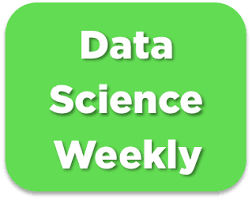

# Challenge : predict conversions 🏆🏆
In this project, you will participate to a machine learning competition like the ones that are organized by https://www.kaggle.com/. You will be able to work with jupyter notebooks as usual, but in the end you'll have to submit your model's predictions to your teacher/TA, so your model's performances will be evaluated in an independent way. The scores achieved by the different teams will be stored into a leaderboard 🏅🏅

## Description of a machine learning challenge 🚴🚴
- In machine learning challenges, the dataset is always separated into to files :
    - *data_train.csv* contains **labelled data**, which means there are both X (explanatory variables) and Y (the target to be predicted). You will use this file to train your model as usual : make the train/test split, preprocessings, assess performances, try different models, fine-tune hyperparameters etc...
    - *data_test.csv* contains "new" examples that have not be used to train the model, in the same format as in *data_train.csv* but it is **unlabeled**, which means the target Y has been removed from the file. Once you've trained a model, you will use *data_test.csv* to make some predictions that you will send to the organizing team. They will then be able to assess the performances of your model in an independent way, by preventing cheating 🤸
- Your model's predictions will be compared to the true labels and releases a leaderboard where the scores of all the teams around the world are stored
- All the participants are informed about the metric that will be used to assess the scores. You have to make sure you're using the same metric to evaluate your train/test performances !

## Company's Description 📇
www.datascienceweekly.org is a famous newsletter curated by independent data scientists. Anyone can register his/her e-mail address on this website to receive weekly news about data science and its applications !

## Project 🚧
The data scientists who created the newsletter would like to understand better the behaviour of the users visiting their website. They would like to know if it's possible to build a model that predicts if a given user will subscribe to the newsletter, by using just a few information about the user. They would like to analyze the parameters of the model to highlight features that are important to explain the behaviour of the users, and maybe discover a new lever for action to improve the newsletter's conversion rate.

They designed a competition aiming at building a model that allows to predict the *conversions* (i.e. when a user will subscribe to the newsletter). To do so, they open-sourced a dataset containing some data about the traffic on their website. To assess the rankings of the different competing teams, they decided to use the **f1-score**.

## Goals 🎯
The project can be cut into four steps :
- Part 1 : make an EDA and the preprocessings and train a baseline model with the file *data_train.csv*
- Part 2 : improve your model's f1-score on your test set (you can try feature engineering, feature selection, regularization, non-linear models, hyperparameter optimization by grid search, etc...)
- Part 3 : Once you're satisfied with your model's score, you can use it to make some predictions with the file *data_test.csv*. You will have to dump the predictions into a .csv file that will be sent to Kaggle (actually, to your teacher/TA 🤓). You can make as many submissions as you want, feel free to try different models !
- Part 4 : Take some time to analyze your best model's parameters. Are there any lever for action that would help to improve the newsletter's conversion rate ? What recommendations would you make to the team ?

## Deliverable 📬
To complete this project, your team should: 
- Create some relevant figures for EDA
- Train at least one model that predicts the conversions and evaluate its performances (f1, confusion matrices)
- Make at least one submission to the leaderboard 
- Analyze your best model's parameters and try to make some recommendations to improve the conversion rate in the future


## Helpers 🦮

To help you with the methodology, we created a template (**02-Conversion_rate_challenge_template.ipynb**) in which all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the EDA/preprocessing/training steps ! May the force be with you 🧨🧨 

This is the template that shows the different steps of the challenge. In this notebook, all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the preprocessing/training steps to get the model with the best f1-score ! May the force be with you 🧨🧨  

**For a detailed description of this project, please refer to *02-Conversion_rate_challenge.ipynb*.**

# I. Import libraries

In [1]:
!pip install plotly

  Using cached plotly-5.5.0-py2.py3-none-any.whl (26.5 MB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [54]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, confusion_matrix

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE
from IPython.display import display

# II. Read file with labels

In [55]:
data = pd.read_csv('Data/conversion_data_train.csv')
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284580, 6)


In [4]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


# III. Explore dataset

In [56]:
# The dataset is quite big : you must create a sample of the dataset before making any visualizations !
data_sample = data.sample(10000, random_state=42)

## a. Basic info & stats of the data

In [57]:
print("Conversion Rate Data Train :")
display(data_sample)

display(data_sample.info())

print("Basics statistics: ")
display(data_sample.describe(include="all"))

print("Percentage of missing values : ")
display((data_sample.isna().sum()/data_sample.shape[0]*100).sort_values(ascending=False))

Conversion Rate Data Train :


,country,age,new_user,source,total_pages_visited,converted
256001,China,28,0,Direct,3,0
97792,US,19,0,Seo,1,0
121376,US,28,1,Seo,5,0
272924,US,22,1,Ads,7,0
239529,UK,27,1,Seo,7,0
...,...,...,...,...,...,...
3886,China,30,1,Seo,6,0
20238,US,21,0,Ads,2,0
109633,US,28,1,Seo,10,0
110208,UK,38,0,Seo,11,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 256001 to 176567
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   country              10000 non-null  object
 1   age                  10000 non-null  int64 
 2   new_user             10000 non-null  int64 
 3   source               10000 non-null  object
 4   total_pages_visited  10000 non-null  int64 
 5   converted            10000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 546.9+ KB


None

Basics statistics: 


,country,age,new_user,source,total_pages_visited,converted
count,10000,10000.000000,10000.000000,10000,10000.000000,10000.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,5591,NaN,NaN,4934,NaN,NaN
mean,NaN,30.474100,0.681900,NaN,4.843600,0.029000
std,NaN,8.248244,0.465762,NaN,3.293148,0.167815
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


Percentage of missing values : 


converted              0.0
total_pages_visited    0.0
source                 0.0
new_user               0.0
age                    0.0
country                0.0
dtype: float64

In [7]:
# Distribution of target
data_sample["converted"].value_counts()

0    9710
1     290
Name: converted, dtype: int64

<AxesSubplot:>

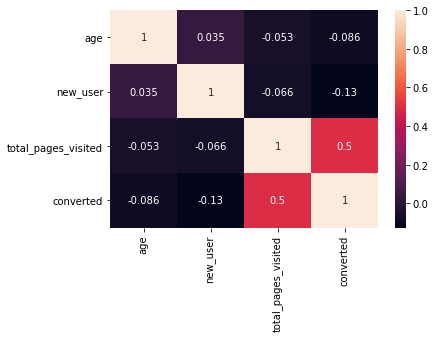

In [8]:
corr = data_sample.corr()
sns.heatmap(corr,annot=True)

<AxesSubplot:xlabel='total_pages_visited', ylabel='converted'>

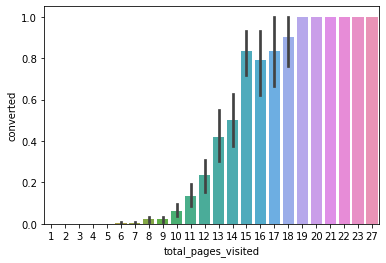

In [9]:
sns.barplot(x = data_sample["total_pages_visited"],y=data_sample["converted"])

<AxesSubplot:xlabel='total_pages_visited', ylabel='Count'>

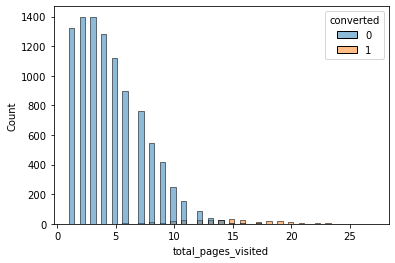

In [10]:
sns.histplot(x = data_sample["total_pages_visited"],hue=data_sample["converted"])

<AxesSubplot:xlabel='country', ylabel='converted'>

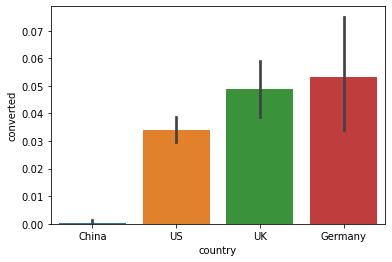

In [11]:
sns.barplot(x=data_sample["country"],y=data_sample["converted"])

<AxesSubplot:xlabel='country', ylabel='Count'>

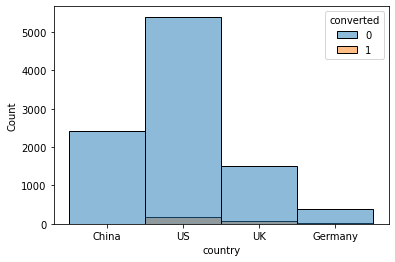

In [12]:
sns.histplot(x=data_sample["country"], hue =data_sample["converted"])

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='age'>

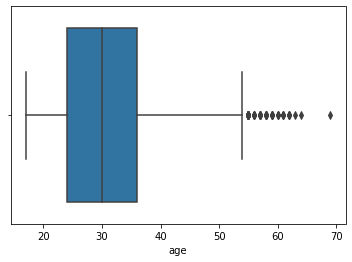

In [13]:
sns.boxplot(data_sample["age"])

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='total_pages_visited'>

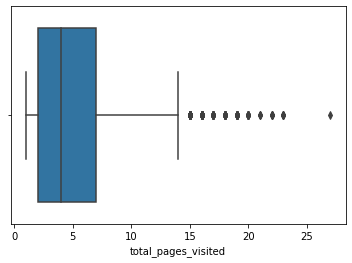

In [14]:
sns.boxplot(data_sample["total_pages_visited"])

<AxesSubplot:xlabel='age', ylabel='converted'>

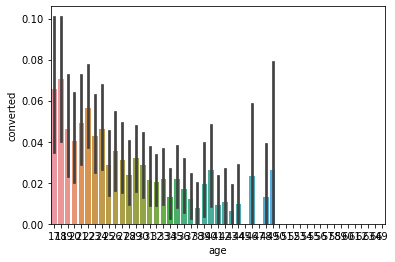

In [15]:
sns.barplot(x=data_sample["age"],y=data_sample["converted"])

<AxesSubplot:xlabel='age', ylabel='Count'>

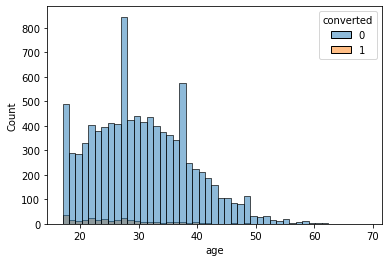

In [16]:
sns.histplot(x=data_sample["age"],hue=data_sample["converted"])

<AxesSubplot:xlabel='converted', ylabel='age'>

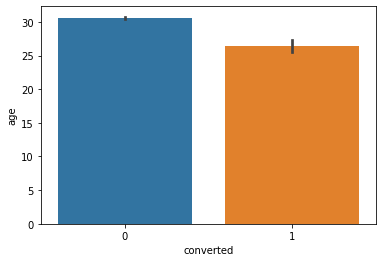

In [17]:
sns.barplot(x=data_sample["converted"], y=data_sample["age"])

<AxesSubplot:xlabel='new_user', ylabel='converted'>

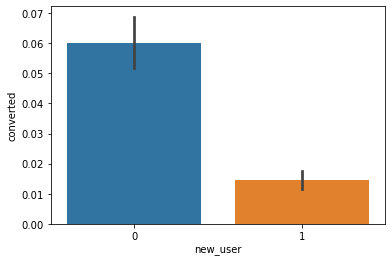

In [18]:
sns.barplot(x=data_sample["new_user"],y=data_sample["converted"])

<AxesSubplot:xlabel='new_user', ylabel='count'>

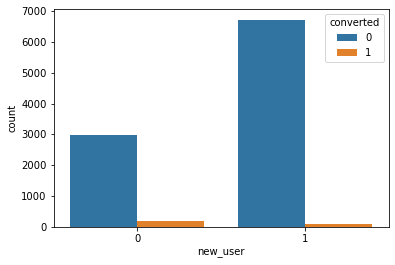

In [19]:
sns.countplot(x=data_sample["new_user"],hue=data_sample["converted"])

<AxesSubplot:xlabel='source', ylabel='Count'>

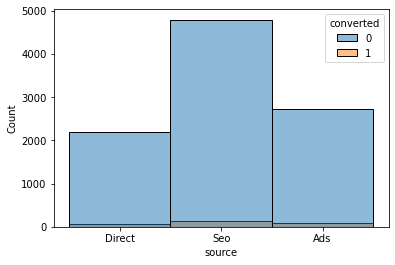

In [20]:
sns.histplot(x=data_sample["source"], hue =data_sample["converted"])

# IV. Make your model

## Choose variables to use in the model, and create train and test sets
**From the EDA, we know that the most useful feature is total_pages_visited. Let's create a baseline model by using at first only this feature : in the next cells, we'll make preprocessings and train a simple (univariate) logistic regression.**

In [58]:
features_list = ['total_pages_visited']
numeric_indices = [0]
target_variable = 'converted'

In [61]:
X1 = data.loc[:, features_list]
Y1 = data.loc[:, target_variable]

print('Explanatory variables : ', X1.columns)
print()

Explanatory variables :  Index(['total_pages_visited'], dtype='object')



In [62]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.1, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [ ]:
"""# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X1_train = X1_train.values
X1_test = X1_test.values
Y1_train = Y1_train.values
Y1_test = Y1_test.values
print("...Done")

print(X1_train[0:5,:])
print(X1_test[0:2,:])
print()
print(Y1_train[0:5])
print(Y1_test[0:2])"""

## a. Training pipeline

In [63]:
# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
print("...Done")
print(X1_train[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.26070136]
 [ 0.93728655]
 [-0.85969532]
 [-0.56019834]
 [-0.26070136]]


In [64]:
# Train model
print("Train model...")
classifier = LogisticRegression() # 
classifier.fit(X1_train, Y1_train)
print("...Done.")

Train model...
...Done.


In [65]:
# Predictions on training set
print("Predictions on training set...")
Y1_train_pred = classifier.predict(X1_train)
print("...Done.")
print(Y1_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



## b. Test pipeline

In [66]:
# Use X_test, and the same preprocessings as in training pipeline, 
# but call "transform()" instead of "fit_transform" methods (see example below)

print("Encoding categorical features and standardizing numerical features...")

X1_test = sc.transform(X1_test)
print("...Done")
print(X1_test[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[ 0.63778957]
 [ 0.03879562]
 [-0.26070136]
 [-0.26070136]
 [ 0.63778957]]


In [67]:
# Predictions on test set
print("Predictions on test set...")
Y1_test_pred = classifier.predict(X1_test)
print("...Done.")
print(Y1_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



## c. Performance assessment

In [68]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y1_train, Y1_train_pred))
print("f1-score on test set : ", f1_score(Y1_test, Y1_test_pred))

f1-score on train set :  0.6938517686692869
f1-score on test set :  0.7060240963855423


In [69]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y1_train, Y1_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y1_test, Y1_test_pred))
print()

Confusion matrix on train set : 
[[246817   1082]
 [  3280   4943]]

Confusion matrix on test set : 
[[27384   117]
 [  371   586]]



**Our baseline model reaches a f1-score of almost 70%. Now, feel free to refine your model and try to beat this score ! 🚀🚀**

# V. Try Logistic Regression with all features

In [70]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1:]

print(Y.head())
print(X.head())

# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
print("...Done.")
print()

# Put here all the preprocessings
num_features = ["age", "total_pages_visited"]
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_features = ["country", "new_user", "source"]
cat_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop="first"))
])


print("Encoding categorical features and standardizing numerical features...")

preprocessor = ColumnTransformer(transformers =[
    ("num_transformer", num_transformer, num_features),
    ("cat_transformer", cat_transformer, cat_features)
])

X_train = preprocessor.fit_transform(X_train)
X_train[:5]

# Train model
print("Train model...")
bestclassifier = LogisticRegression() # 
bestclassifier.fit(X_train, Y_train.values.ravel())
print("...Done.")

# Predictions on training set
print("Predictions on training set...")
Y_train_pred = bestclassifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Use X_test, and the same preprocessings as in training pipeline, 
# but call "transform()" instead of "fit_transform" methods (see example below)

print("Encoding categorical features and standardizing numerical features...")

X_test = preprocessor.transform(X_test)
print("...Done")
print(X_test)

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = bestclassifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

   converted
0          0
1          0
2          1
3          0
4          0
   country  age  new_user  source  total_pages_visited
0    China   22         1  Direct                    2
1       UK   21         1     Ads                    3
2  Germany   20         0     Seo                   14
3       US   23         1     Seo                    3
4       US   28         1  Direct                    3
Dividing into train and test sets...
...Done.

Encoding categorical features and standardizing numerical features...
Train model...
...Done.
Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Encoding categorical features and standardizing numerical features...
...Done
[[-1.27809213  0.63778957  0.         ...  1.          0.
   0.        ]
 [ 0.05264881  0.03879562  0.         ...  1.          0.
   1.        ]
 [-0.31028053 -0.26070136  0.         ...  0.          0.
   1.        ]
 ...
 [ 1.62534265  1.23678353  0.         ...  0.          1.
   0.        ]
 [-1.64102147 -0.

#### f1-score on train set :  0.7639889569725944
#### f1-score on test set :  0.7562828755113967

In [71]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[246944    955]
 [  2550   5673]]

Confusion matrix on test set : 
[[27394   107]
 [  310   647]]



# VI. Train best classifier on all data and use it to make predictions on X_without_labels
**Before making predictions on the file conversion_data_test.csv, let's train our model on ALL the data that was in conversion_data_train.csv. Sometimes, this allows to make tiny improvements in the score because we're using more examples to train the model.**

In [72]:
# Concatenate our train and test set to train your best classifier on all data with labels
X_fin = np.append(X_train,X_test,axis=0)
Y_fin = np.append(Y_train,Y_test)

bestclassifier.fit(X_fin,Y_fin)

LogisticRegression()

In [77]:
# Read data without labels
X_without_labels = pd.read_csv('Data/conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
#features_list = ["country", "age", "new_user", "source", "total_pages_visited"]
#X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
#print("Convert pandas DataFrames to numpy arrays...")
#X_without_labels = X_without_labels.values
#print("...Done")

print(X_without_labels[0:5])

Prediction set (without labels) : (31620, 5)
  country  age  new_user  source  total_pages_visited
0      UK   28         0     Seo                   16
1      UK   22         1  Direct                    5
2   China   32         1     Seo                    1
3      US   32         1     Ads                    6
4   China   25         0     Seo                    3


In [78]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = preprocessor.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.31028053  3.33326238  0.          1.          0.          0.
   0.          1.        ]
 [-1.03613923  0.03879562  0.          1.          0.          1.
   1.          0.        ]
 [ 0.17362526 -1.15919229  0.          0.          0.          1.
   0.          1.        ]
 [ 0.17362526  0.3382926   0.          0.          1.          1.
   0.          0.        ]
 [-0.67320988 -0.56019834  0.          0.          0.          0.
   0.          1.        ]]


In [79]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': bestclassifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('Pred/conversion_data_test_predictions_FlorianeEsson.csv', index=False)


In [81]:
Y_predictions.head()

,converted
0,1
1,0
2,0
3,0
4,0


In [82]:
Y_predictions.shape

(31620, 1)

## Analyzing the coefficients and interpreting the result
**In this template, we just trained a model with only one feature (total_pages_visited), so there's no analysis to be done about the feature importance 🤔**

**Once you've included more features in your model, please take some time to analyze the model's parameters and try to find some lever for action to improve the newsletter's conversion rate 😎😎**

In [80]:
bestclassifier.coeff_

AttributeError: 'LogisticRegression' object has no attribute 'coeff_'